In [1]:
import pandas as pd

def preprocess_hatewic_individual(input_path: str, output_path: str):
    df = pd.read_csv(input_path, sep=";")

    # Only keep annotator labels that are usable
    df = df[df['label'] != 'Cannot decide']

    # Normalize labels (subjective task): map to binary
    label_map = {
        'Not hateful': 0,
        'Weakly hateful': 1,
        'Strongly hateful': 1
    }
    df['encoded_label'] = df['label'].map(label_map)

    # Use unique annotation ID as ID
    df['id'] = df['annotation_id']

    # Save processed version
    df.to_csv(output_path, index=False)
    print(f"Saved cleaned data to {output_path}")

# Example usage
if __name__ == "__main__":
    preprocess_hatewic_individual(
        input_path='HateWiC_IndividualAnnos.csv',
        output_path='data/processed_HateWiC_IndividualAnnos.csv'
    )


KeyError: 'label'

In [5]:
import pandas as pd

# Load original semicolon-separated file
df = pd.read_csv("HateWiC_IndividualAnnos.csv", sep=";")

# Filter out undecidable labels
df = df[df['annotation_label'] != 'Cannot decide']

# Assign unique IDs per row for annotation-level classification
df['id'] = df['annotation_id']

# Set binary label column for evaluation
df['encoded_label'] = df['binary_label'].astype(int)

# Save cleaned dataset
df.to_csv("hatewic_individual_clean.csv", index=False)
df


,annotation_id,annotator_id,annotation_label,binary_label,annotator_age,annotator_gender,annotator_ethnicity,annotator_profile_description,example_id,example,term,pos,sense_id,wiktionary_definition,agree_with_majority_binary,id,encoded_label
0,1-0,annotator_14,Strongly hateful,1.0,22,Male,Mixed,"Reader is 22, Male and Mixed",1,This is no huge overgrown abbey-lubber.,abbey-lubber,noun,1,An able-bodied idler who grew sleek and fat fr...,True,1-0,1
1,1-1,annotator_31,Weakly hateful,1.0,22,Male,White,"Reader is 22, Male and White",1,This is no huge overgrown abbey-lubber.,abbey-lubber,noun,1,An able-bodied idler who grew sleek and fat fr...,True,1-1,1
2,1-2,annotator_47,Not hateful,0.0,22,Female,Other,"Reader is 22, Female and Other",1,This is no huge overgrown abbey-lubber.,abbey-lubber,noun,1,An able-bodied idler who grew sleek and fat fr...,False,1-2,0
4,2-1,annotator_18,Weakly hateful,1.0,32,Female,Black,"Reader is 32, Female and Black",2,They look at those massive tummies and ample a...,Aberzombie,noun,1,An unthinking conformist who wears fashions fr...,False,2-1,1
5,2-2,annotator_34,Not hateful,0.0,35,Female,White,"Reader is 35, Female and White",2,They look at those massive tummies and ample a...,Aberzombie,noun,1,An unthinking conformist who wears fashions fr...,False,2-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12437,4670-1,annotator_59,Weakly hateful,1.0,24,Female,White,"Reader is 24, Female and White",4670,"Fuck me, there's actually more ziggers on tele...",zigger,noun,2,A Russian who supports Kremlin doctrine.,True,4670-1,1
12438,4670-2,annotator_65,Strongly hateful,1.0,21,Male,White,"Reader is 21, Male and White",4670,"Fuck me, there's actually more ziggers on tele...",zigger,noun,2,A Russian who supports Kremlin doctrine.,True,4670-2,1
12439,4671-0,annotator_8,Strongly hateful,1.0,25,Male,White,"Reader is 25, Male and White",4671,Why are they dancing?!?!? Don't they know zigg...,zigger,noun,2,A Russian who supports Kremlin doctrine.,True,4671-0,1
12440,4671-1,annotator_24,Weakly hateful,1.0,24,Male,White,"Reader is 24, Male and White",4671,Why are they dancing?!?!? Don't they know zigg...,zigger,noun,2,A Russian who supports Kremlin doctrine.,True,4671-1,1


In [6]:
df = pd.read_csv("hatewic_individual_clean.csv")
df

,annotation_id,annotator_id,annotation_label,binary_label,annotator_age,annotator_gender,annotator_ethnicity,annotator_profile_description,example_id,example,term,pos,sense_id,wiktionary_definition,agree_with_majority_binary,id,encoded_label
0,1-0,annotator_14,Strongly hateful,1.0,22,Male,Mixed,"Reader is 22, Male and Mixed",1,This is no huge overgrown abbey-lubber.,abbey-lubber,noun,1,An able-bodied idler who grew sleek and fat fr...,True,1-0,1
1,1-1,annotator_31,Weakly hateful,1.0,22,Male,White,"Reader is 22, Male and White",1,This is no huge overgrown abbey-lubber.,abbey-lubber,noun,1,An able-bodied idler who grew sleek and fat fr...,True,1-1,1
2,1-2,annotator_47,Not hateful,0.0,22,Female,Other,"Reader is 22, Female and Other",1,This is no huge overgrown abbey-lubber.,abbey-lubber,noun,1,An able-bodied idler who grew sleek and fat fr...,False,1-2,0
3,2-1,annotator_18,Weakly hateful,1.0,32,Female,Black,"Reader is 32, Female and Black",2,They look at those massive tummies and ample a...,Aberzombie,noun,1,An unthinking conformist who wears fashions fr...,False,2-1,1
4,2-2,annotator_34,Not hateful,0.0,35,Female,White,"Reader is 35, Female and White",2,They look at those massive tummies and ample a...,Aberzombie,noun,1,An unthinking conformist who wears fashions fr...,False,2-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11897,4670-1,annotator_59,Weakly hateful,1.0,24,Female,White,"Reader is 24, Female and White",4670,"Fuck me, there's actually more ziggers on tele...",zigger,noun,2,A Russian who supports Kremlin doctrine.,True,4670-1,1
11898,4670-2,annotator_65,Strongly hateful,1.0,21,Male,White,"Reader is 21, Male and White",4670,"Fuck me, there's actually more ziggers on tele...",zigger,noun,2,A Russian who supports Kremlin doctrine.,True,4670-2,1
11899,4671-0,annotator_8,Strongly hateful,1.0,25,Male,White,"Reader is 25, Male and White",4671,Why are they dancing?!?!? Don't they know zigg...,zigger,noun,2,A Russian who supports Kremlin doctrine.,True,4671-0,1
11900,4671-1,annotator_24,Weakly hateful,1.0,24,Male,White,"Reader is 24, Male and White",4671,Why are they dancing?!?!? Don't they know zigg...,zigger,noun,2,A Russian who supports Kremlin doctrine.,True,4671-1,1


In [ ]:
import torch, pickle, re
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
from difflib import get_close_matches
from os import path

class ContextEncoder(torch.nn.Module):
    def __init__(self, encoder_name):
        super(ContextEncoder, self).__init__()
        self.context_encoder = AutoModel.from_pretrained(encoder_name, output_hidden_states=True)

    def forward(self, input_ids):
        context_output = self.context_encoder(input_ids)
        return context_output

class BiEncoderModel(torch.nn.Module):
    def __init__(self, encoder_name):
        super(BiEncoderModel, self).__init__()
        self.context_encoder = ContextEncoder(encoder_name)

    def context_forward(self, context_input):
        return self.context_encoder.forward(context_input)
    

def find_target_indices(tknzr, example, term):
            
    # encode example and target term
    example_encoding = tknzr.encode(example, truncation=True)
    term_encoding = tknzr.encode(term, add_special_tokens=False)
    
    # find indices for target term
    term_indices = None
    for i in range(len(example_encoding)):
        if example_encoding[i:i+len(term_encoding)] == term_encoding:
            term_indices = (i, i+len(term_encoding))
    
    if not term_indices:
        new_term = None
        new_example = None
        
        # try plural (simple rules)
        if term + 's' in example:
            new_term = term + 's'
        elif term.replace('y', 'ies') in example:
            new_term = term.replace('y', 'ies')
        elif term.replace('man', 'men') in example:
            new_term = term.replace('man', 'men')
        else:
            # try to find the most similar word in the example
            potential_target = get_close_matches(term, example.split(), n=1, cutoff=0.6)
            if len(potential_target) == 1:
                most_similar = re.sub(r'[^\w\s-]','', potential_target[0])
                # replace the most similar word (for which we assume misspelling) with the target term
                new_example = example.replace(most_similar, term)
        
        if new_term or new_example:
            # encode new term or example
            if new_term:
                term_encoding = tknzr.encode(new_term, add_special_tokens=False)
            elif new_example:
                example_encoding = tknzr.encode(new_example, truncation=True)
            # try finding indices again
            for i in range(len(example_encoding)):
                if example_encoding[i:i+len(term_encoding)] == term_encoding:
                    term_indices = (i, i+len(term_encoding))
    
    return term_indices


def extract_biencoder_embedding(model, example_encoding, term_indices, layers):

    # feed example encodings to the model    
    input_ids = torch.tensor([example_encoding])
    encoded_layers = model.context_forward(input_ids)[-1]
    
    # extract selection of hidden layer(s)
    if layers == 'last':
        layers = -1
        vecs = encoded_layers[layers].squeeze(0)
    elif layers == 'lastfour':
        layers = [-4, -3, -2, -1]
        selected_encoded_layers = [encoded_layers[x] for x in layers]
        vecs = torch.mean(torch.stack(selected_encoded_layers), 0).squeeze(0)
    elif layers == 'all':
        vecs = torch.mean(torch.stack(encoded_layers), 0).squeeze(0)
    
    # target word selection 
    vecs = vecs.detach()
    start_idx, end_idx = term_indices
    vecs = vecs[start_idx:end_idx]
    
    # aggregate sub-word embeddings (by averaging)
    vector = torch.mean(vecs, 0)
    
    return vector


def extract_embedding(model, example_encoding, term_indices, layers):

    # feed example encodings to the model    
    input_ids = torch.tensor([example_encoding])
    encoded_layers = model(input_ids)[-1]
    
    # extract selection of hidden layer(s)
    if layers == 'last':
        layers = -1
        vecs = encoded_layers[layers].squeeze(0)
    elif layers == 'lastfour':
        layers = [-4, -3, -2, -1]
        selected_encoded_layers = [encoded_layers[x] for x in layers]
        vecs = torch.mean(torch.stack(selected_encoded_layers), 0).squeeze(0)
    elif layers == 'all':
        vecs = torch.mean(torch.stack(encoded_layers), 0).squeeze(0)
    
    # target word selection 
    vecs = vecs.detach()
    start_idx, end_idx = term_indices
    vecs = vecs[start_idx:end_idx]
    
    # aggregate sub-word embeddings (by averaging)
    vector = torch.mean(vecs, 0)
    
    return vector


def dataid2biencoderembeddings(input_path, example_column, id_column, output_path, encoder_model_name, wsd_biencoder_path, layers, type='token'):

    data = pd.read_csv(input_path)
    tknzr = AutoTokenizer.from_pretrained(encoder_model_name)
    model = BiEncoderModel(encoder_model_name)
    model.load_state_dict(torch.load(wsd_biencoder_path, map_location=torch.device('cpu')), strict=False)
    model.eval()

    embeddings = dict()
    for _, row in tqdm(data.iterrows()):
        example = row[example_column].lower() 
        example_encoding = tknzr.encode(example, truncation=True)
        if type == 'token':
            term_indices = find_target_indices(tknzr, example, row['term'].lower())     
        elif type == 'sentence':
            term_indices = (0, len(example_encoding))
        if term_indices:
            # extract embedding
            vector = extract_biencoder_embedding(model, example_encoding, term_indices, layers=layers)
            embeddings[row[id_column]] = vector
    
    with open(output_path, 'wb') as outfile:
        pickle.dump(embeddings, outfile)


def dataid2embeddings(input_path, example_column, id_column, output_path, model_name, layers, type='token'):

    data = pd.read_csv(input_path)
    tknzr = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
    model.eval()

    embeddings = dict()
    for _, row in tqdm(data.iterrows()):
        example = row[example_column].lower()
        example_encoding = tknzr.encode(example, truncation=True)
        if type == 'token':
            term_indices = find_target_indices(tknzr, example, row['term'].lower())
        elif type == 'sentence':
            term_indices = (0, len(example_encoding))
        if term_indices:
            # extract embedding
            vector = extract_embedding(model, example_encoding, term_indices, layers=layers)
            embeddings[row[id_column]] = vector
    
    with open(output_path, 'wb') as outfile:
        pickle.dump(embeddings, outfile)


def concatenate_embeddings(embedding_path1, embedding_path2, output_path):
    
    embeddings = dict()

    with open(embedding_path1, 'rb') as infile:
        id2embeddings1 = pickle.load(infile)
    
    with open(embedding_path2, 'rb') as infile:
        id2embeddings2 = pickle.load(infile)

    for id, e1 in id2embeddings1.items():
        e2 = id2embeddings2[id]
        embeddings[id] = torch.cat((e1, e2))

    with open(output_path, 'wb') as outfile:
        pickle.dump(embeddings, outfile)


def get_embedding_file(data_path, id_column, embedding_dir, embedding_type, model, layers):

    model_name = model.rsplit('/',1)[1] if '/' in model else model
    model_name = model_name.rsplit('.',1)[0] if '.' in model_name else model_name

    if 'example' in embedding_type:
        embedding_path = embedding_dir + f'{model_name}-{layers}-examples'
        if not path.exists(embedding_path):
            if 'biencoder' in model_name:
                dataid2biencoderembeddings(data_path, 'example', id_column, embedding_path, 'bert-base-uncased', model, layers)
            else:
                dataid2embeddings(data_path, 'example', id_column, embedding_path, model, layers, type='token')

    if 'generated_definition' in embedding_type:
        definition_path = embedding_dir + f'{model_name}-{layers}-generated_definitions'
        if not path.exists(definition_path):
            if 'biencoder' in model_name:
                dataid2biencoderembeddings(data_path, 'generated_definition', id_column, definition_path, 'bert-base-uncased', model, layers, type='sentence')
            else:
                dataid2embeddings(data_path, 'generated_definition', id_column, definition_path, model, layers, type='sentence')
        if not 'example' in embedding_type:
            embedding_path = definition_path
        else:
            combined_path = embedding_path+'-generated_definitions'
            if not path.exists(combined_path):
                concatenate_embeddings(embedding_path, definition_path, combined_path)
            embedding_path = combined_path
    elif 'definition' in embedding_type:
        definition_path = embedding_dir + f'{model_name}-{layers}-definitions'
        if not path.exists(definition_path):
            if 'biencoder' in model_name:
                dataid2biencoderembeddings(data_path, 'definition', id_column, definition_path, 'bert-base-uncased', model, layers, type='sentence')
            else:
                dataid2embeddings(data_path, 'definition', id_column, definition_path, model, layers, type='sentence')
        if not 'example' in embedding_type:
            embedding_path = definition_path
        else:
            combined_path = embedding_path+'-definitions'
            if not path.exists(combined_path):
                concatenate_embeddings(embedding_path, definition_path, combined_path)
            embedding_path = combined_path
    
    if 'target' in embedding_type:
        target_path = embedding_dir + f'{model_name}-{layers}-targets'
        if not path.exists(target_path):
            if 'biencoder' in model_name:
                dataid2biencoderembeddings(data_path, 'profile_description', id_column, target_path, 'bert-base-uncased', model, layers, type='sentence')
            else:
                dataid2embeddings(data_path, 'profile_description', id_column, target_path, model, layers, type='sentence')
        combined_path = embedding_path+'-targets'
        if not path.exists(combined_path):
            concatenate_embeddings(embedding_path, target_path, combined_path)
        embedding_path = combined_path
    
    return embedding_path

In [22]:
# Parameters
data_path = "hatewic_individual_clean.csv"
id_column = "id"
embedding_dir = "./embeddings/"
embedding_type = "example+definition"
model = "GroNLP/hateBERT"
layers = "last"

# Generate embeddings
embedding_path = get_embedding_file(data_path, id_column, embedding_dir, embedding_type, model, layers)
print("Embeddings saved to:", embedding_path)

0it [00:00, ?it/s]


KeyError: 'definition'

In [5]:
import pandas as pd

input_path = "HateWiC_IndividualAnnos.csv"
output_path = "hatewic_individual_clean.csv"

df = pd.read_csv(input_path, sep=";")
df = df.rename(columns={"annotation_id": "id"})  # required by get_embedding_file
df.to_csv(output_path, index=False)


In [9]:
# from embeddings import get_embedding_file

data_path = "hatewic_individual_clean.csv"
id_column = "id"
embedding_dir = "./embeddings/"  # make sure this exists
embedding_type = "example"
model = "GroNLP/hateBERT"
layers = "last"

embedding_path = get_embedding_file(data_path, id_column, embedding_dir, embedding_type, model, layers)
print("Embeddings saved to:", embedding_path)


Embeddings saved to: ./embeddings/hateBERT-last-examples


In [13]:
import pickle, more_itertools, random
from tqdm import tqdm
import pandas as pd
# from classification import train_test_MLP, MLP_GridSearch, \
#                             train_test_DimProj, DimProj_SimThresSearch
from sklearn.metrics import accuracy_score, classification_report

def tenfoldsplits2instances(instances):
    random.shuffle(instances)
    tenfolds = [set(fold) for fold in more_itertools.divide(10, instances)]
    fold2instances = {i: {'test': tenfolds[i-1],
                    'dev': tenfolds[i-2], 
                    'train': set().union(*[f for j, f in enumerate(tenfolds) if j not in (i-1, 9 if i == 1 else i-2)])
                    } for i in range(1, 11)}
    return fold2instances


def get_split_data(data, id2embeddings, split2items, item_column, id_column):

    train_X, train_y, dev_X, dev_y, test_X, test_y = [], [], [], [], [], []
    train_data, dev_data, test_data = [], [], []
    
    for _, row in data.iterrows():
        if row[item_column] in split2items['train']:
            train_X.append(id2embeddings[row[id_column]])
            train_y.append(row['encoded_label'])
            train_data.append(row)
        elif row[item_column] in split2items['dev']:
            dev_X.append(id2embeddings[row[id_column]])
            dev_y.append(row['encoded_label'])
            dev_data.append(row)
        elif row[item_column] in split2items['test']:
            test_X.append(id2embeddings[row[id_column]])
            test_y.append(row['encoded_label'])
            test_data.append(row)

    return train_X, train_y, dev_X, dev_y, test_X, test_y,\
          train_data, dev_data, test_data


def evaluate(data_path, id_column, label_column, label_encoder, embedding_path, 
             output_path, clf, params, random_split_seed, splitby):

    logs = []
    random.seed(random_split_seed)

    # load sense representations of model
    with open(embedding_path, 'rb') as infile:
        id2embeddings = pickle.load(infile)
    
    # load and shuffle data and encode labels
    data = pd.read_csv(data_path).sample(frac=1, random_state=12, ignore_index=True)
    #data[label_column] = data[label_column].fillna('NaN') # uncomment if Wiktionary labels
    data['encoded_label'] = data[label_column].replace(label_encoder)
    # exclude data for which no model representations exist and no label for exist
    data = data[data[id_column].isin(id2embeddings)].dropna(subset=['encoded_label']) 
    data = data.drop(data[data[label_column] == "None"].index)
    
    # initialize 10 folds based on set of unique items
    fold2items = tenfoldsplits2instances(list(set(data[splitby])))
    tenfold_accuracies, test_data, test_predictions = [], [], []
    for i, (fold_no, split2items) in tqdm(enumerate(fold2items.items())):
        logs.append(f"\nFold {fold_no}")
        
        # get data based on sets of items (type specified in splitby)
        train_X, train_y, dev_X, dev_y, test_X, test_y,\
          train_fold_data, dev_fold_data, test_fold_data = get_split_data(data, id2embeddings, split2items, splitby, id_column)
        logs.append(f"Train size: {len(train_y)} / Dev size: {len(dev_y)} / Test size: {len(test_y)}")
        test_data.extend([dict(row, **{'test_fold_no': fold_no}) for row in test_fold_data])

        # train and test classification model
        if clf == 'mlp':
            if not params:
                best_params = MLP_GridSearch(dev_X, dev_y)
                predictions, accuracy = train_test_MLP(train_X, train_y, test_X, test_y, best_params)
                logs.append(f"Grid Search Result - Best Hyperparameters: {best_params}")
            else:
                predictions, accuracy = train_test_MLP(train_X, train_y, test_X, test_y, params)
        elif clf == 'dimproj':
            if not params:
                best_params = DimProj_SimThresSearch(train_X, train_y, dev_X, dev_y)
                predictions, accuracy = train_test_DimProj(train_fold_data, train_X, train_y, test_X, test_y, best_params) 
                logs.append(f"Best Similarity Threshold (for embedding pair selection): {best_params}")
            else:
                predictions, accuracy, n_pairs = train_test_DimProj(train_fold_data, train_X, train_y, test_X, test_y, params) 
                logs.append(f"{n_pairs} pairs included for dimension creation")
            
        logs.append(f"Accuracy: {accuracy}")
        tenfold_accuracies.append(accuracy)
        test_predictions.extend(predictions)
    
    # save preds
    output_df = pd.DataFrame(test_data)
    output_df['prediction'] = test_predictions
    output_df.to_csv(output_path, index=False)

    logs.append(f'\nAverage of accuracies over {len(tenfold_accuracies)} folds: {sum(tenfold_accuracies)/len(tenfold_accuracies)}')
    logs.append(f"Overall accuracy of predictions for all test folds: {accuracy_score(output_df['encoded_label'], output_df['prediction'])}")
    logs.append(classification_report(output_df['encoded_label'], output_df['prediction'])) 

    return logs

In [11]:
!pip install more-itertools


You should consider upgrading via the 'C:\Users\archi\Documents\UIC\421\paper-reproducibility\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [18]:
import torch
from torchmetrics.functional import pairwise_cosine_similarity
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def train_test_MLP(X_train, y_train, X_test, y_test, params):

    X_train = torch.stack(X_train)  
    X_test = torch.stack(X_test)

    clf = MLPClassifier(random_state=12).set_params(**params).fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return predictions, accuracy

@ignore_warnings(category=ConvergenceWarning)
def MLP_GridSearch(X_dev, y_dev, 
                   param_grid = {
                       'hidden_layer_sizes':[(300, 200, 100, 50), (200, 100, 50), (100, 50)], 
                       'learning_rate_init':[0.0005, 0.001, 0.005],
                       'max_iter': [10, 20, 40, 80, 100, 200]}):

    mlp = MLPClassifier(random_state=12)
    clf = GridSearchCV(mlp, param_grid)
    clf.fit(torch.stack(X_dev), y_dev)

    return clf.best_params_


def train_test_DimProj(train_data, X_train, y_train, X_test, y_test, params):
    # binary classification only

    pos_vecs, neg_vecs = [], []
    pos_data_ids, neg_data_ids = [], []
    for i, y in enumerate(y_train):
        if y == 0:
            pos_vecs.append(X_train[i])
            #pos_data_ids.append(train_data[i]['id'])
        else:
            neg_vecs.append(X_train[i])
            #neg_data_ids.append(train_data[i]['id'])

    # create dimension vector
    pairwise_dist = pairwise_cosine_similarity(torch.stack(pos_vecs), torch.stack(neg_vecs))
    pairwise_dist_dict = dict()
    for p_id in range(len(pos_vecs)):
        for n_id in range(len(neg_vecs)):
            pairwise_dist_dict[(p_id, n_id)] = pairwise_dist[p_id, n_id].item()
    top_similar_pairs = [pair for pair, sim in pairwise_dist_dict.items() if sim >= params['sim_thres']]
    
    if len(top_similar_pairs) > 0:
        diff_vecs = [pos_vecs[p_id] - neg_vecs[n_id] for (p_id, n_id) in top_similar_pairs]
        dimension = torch.mean(torch.stack(diff_vecs), 0)

        #dimension_data = [(pos_data_ids[pos_id], neg_data_ids[neg_id], 
                #pairwise_dist_dict[(pos_id, neg_id)]) for (pos_id, neg_id) in top_similar_pairs]

        # project test embeddings
        cos = torch.nn.CosineSimilarity(dim=0)
        threshold = 0 # make this decision threshold a parameter?
        predictions = []
        for x in X_test:
            cossim = cos(x, dimension).item()
            predictions.append(1 if cossim > threshold else 0)
        accuracy = accuracy_score(y_test, predictions)
    
        return predictions, accuracy, len(top_similar_pairs)
    
    print(f"No pairs with similarity above threshold {params['sim_thres']}")
    return [], 0, 0

def DimProj_SimThresSearch(X_train, y_train, X_dev, y_dev, 
                            sim_thresholds=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
    
    best_acc = 0
    for st in sim_thresholds:
        params = {'sim_thres': st}
        _, acc = train_test_DimProj([], X_train, y_train, X_dev, y_dev, params)
        #print('similarity threshold', st, '- accuracy:', acc)
        if acc > best_acc:
            best_acc = acc
            best_params = {'sim_thres': st}
    
    return best_params
    

In [17]:
!pip install torchmetrics

You should consider upgrading via the 'C:\Users\archi\Documents\UIC\421\paper-reproducibility\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
# from tenfold_eval import evaluate

label_column = "binary_label"
label_encoder = {"0": 0, "1": 1}
predictions_path = "./predictions/hatewic-hatebert-example-last.csv"
clf = "mlp"
params = {"hidden_layer_sizes": (300, 200, 100, 50), "learning_rate_init": 0.0005, "max_iter": 10}
splitby = "id"  # other option is "term"

# logs = evaluate(data_path, id_column, label_column, label_encoder,
#                 embedding_path, predictions_path, clf, params, random_split_seed=12, splitby=splitby)

logs = evaluate(
    data_path=data_path,
    id_column="id",
    label_column="binary_label",
    label_encoder={"0": 0, "1": 1},
    embedding_path=embedding_path,
    output_path=predictions_path,
    clf="mlp",
    params=params,
    random_split_seed=12,
    splitby=splitby
)

for log in logs:
    print(log)


10it [02:22, 14.26s/it]



Fold 1
Train size: 9208 / Dev size: 1150 / Test size: 1151
Accuracy: 0.741094700260643

Fold 2
Train size: 9207 / Dev size: 1151 / Test size: 1151
Accuracy: 0.7289313640312771

Fold 3
Train size: 9207 / Dev size: 1151 / Test size: 1151
Accuracy: 0.735881841876629

Fold 4
Train size: 9207 / Dev size: 1151 / Test size: 1151
Accuracy: 0.7419635099913119

Fold 5
Train size: 9207 / Dev size: 1151 / Test size: 1151
Accuracy: 0.736750651607298

Fold 6
Train size: 9207 / Dev size: 1151 / Test size: 1151
Accuracy: 0.7228496959165943

Fold 7
Train size: 9207 / Dev size: 1151 / Test size: 1151
Accuracy: 0.7471763683753258

Fold 8
Train size: 9207 / Dev size: 1151 / Test size: 1151
Accuracy: 0.7428323197219809

Fold 9
Train size: 9207 / Dev size: 1151 / Test size: 1151
Accuracy: 0.7558644656820156

Fold 10
Train size: 9208 / Dev size: 1151 / Test size: 1150
Accuracy: 0.7208695652173913

Average of accuracies over 10 folds: 0.7374214482680468
Overall accuracy of predictions for all test folds: 0.7

In [20]:
def run(data_path, id_column, label_column, label_encoder,
                   embedding_dir, predictions_dir, logs_path,
                   models, model_layers, clf, embedding_types,
                   splitby, params=dict(), random_split_seed=12):
    
    logs = []
    for model in models:
        model_name = model.rsplit('/',1)[1] if '/' in model else model
        model_name = model_name.rsplit('.',1)[0] if '.' in model_name else model_name
        for embedding_type in embedding_types:
            experiment_description = f'\n{clf} / {model_name} / {embedding_type} embeddings / {model_layers} layer(s) / split by {splitby}\n'.upper()
            logs.append(experiment_description)
            logs.append(f"Hyperparameters: {params}")
            print(experiment_description)
            # default embeddings are token embeddings of example usages
            embedding_path = get_embedding_file(data_path, id_column, embedding_dir, embedding_type, model, model_layers)
            predictions_path = predictions_dir + f'{clf}-{model_name}-{embedding_type}-{model_layers}-splitby{splitby}.csv'
            if 'dinu' in data_path:
                experiment_logs = dinu_evaluate(data_path, label_column, embedding_path, predictions_path, clf, params, random_split_seed)
            else:
                experiment_logs = evaluate(data_path, id_column, label_column, label_encoder, embedding_path, 
                                            predictions_path, clf, params, random_split_seed, splitby) 
            logs.extend(experiment_logs)
            #print(experiment_logs)
    
    with open(logs_path, 'w') as outfile:
        for string in logs:
            outfile.write(string+'\n')

In [23]:
# from run import run

# Run evaluation on individual annotations
run(
    data_path="hatewic_individual_clean.csv",
    id_column="id",
    label_column="binary_label",  # <- FIXED HERE
    label_encoder=None,           # <- None because 0/1 are already fine
    embedding_dir="./embeddings/",
    predictions_dir="./predictions/",
    logs_path="hatewic_individual_eval.log",
    models=["GroNLP/hateBERT"],
    model_layers="last",
    clf="mlp",
    embedding_types=["example"],
    splitby="id",                 # <- Also use a valid column for splitting
    params={"hidden_layer_sizes": (300, 200, 100, 50), "learning_rate_init": 0.0005, "max_iter": 10},
    random_split_seed=12
)




MLP / HATEBERT / EXAMPLE EMBEDDINGS / LAST LAYER(S) / SPLIT BY ID



C:\Users\archi\AppData\Local\Temp\ipykernel_12512\4094459053.py:54: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  data['encoded_label'] = data[label_column].replace(label_encoder)
10it [02:18, 13.89s/it]


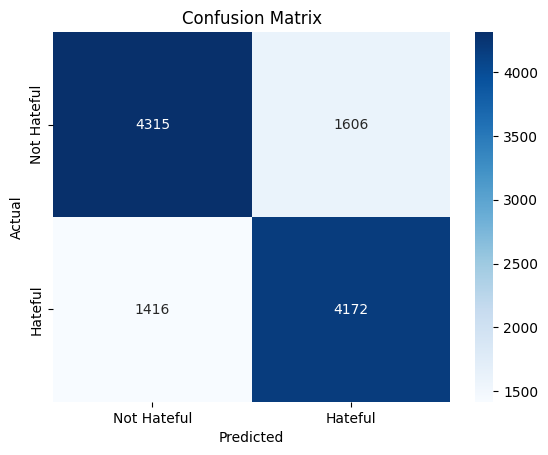

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      5921
         1.0       0.72      0.75      0.73      5588

    accuracy                           0.74     11509
   macro avg       0.74      0.74      0.74     11509
weighted avg       0.74      0.74      0.74     11509


🔴 False Positives (Not Hateful → Hateful):


,example,term,annotation_label,annotator_id
1,"It’s my reaction to the violence, however, tha...",pearl-clutcher,Not hateful,annotator_74
8,He was squatting on the ground like a blackfel...,blackfellow,Not hateful,annotator_78
15,But you must not like him because he appointed...,cdesign proponentsist,Not hateful,annotator_58
21,"Food, real food, not nut cutlets then, and not...",yoghurt-knitter,Not hateful,annotator_78
24,[H]is small frame seeming scarecrowed in the o...,scarecrow,Not hateful,annotator_30



🔵 False Negatives (Hateful → Not Hateful):


,example,term,annotation_label,annotator_id
2,This list has been limited to members and coho...,simp,Strongly hateful,annotator_5
10,You've got to fire that fuckup.,fuckup,Strongly hateful,annotator_10
13,"According to another superstition, the longer ...",peeler,Weakly hateful,annotator_79
17,"Why, you would not be boosing till lightman's ...",square,Weakly hateful,annotator_25
23,Sealed cells with about to emerge queens are u...,queen,Weakly hateful,annotator_36



⚠️ Total Disagreements with Majority: 1745
                                                example    term  \
203   They are almost always accompanied by immature...  baldie   
8957  Cool, whatever you say, slick, but I need to t...    dick   
6464  Speaking of knockout panoramas, if you′re fit ...   tramp   
1073  Phototherapy in a 63-year-old man taking SJW  ...     SJW   
5487  As far as he knew, I was just a ho-bag who mak...  ho-bag   

     annotation_label  annotator_id  
203    Weakly hateful  annotator_16  
8957      Not hateful  annotator_60  
6464   Weakly hateful  annotator_55  
1073      Not hateful  annotator_83  
5487   Weakly hateful  annotator_83  


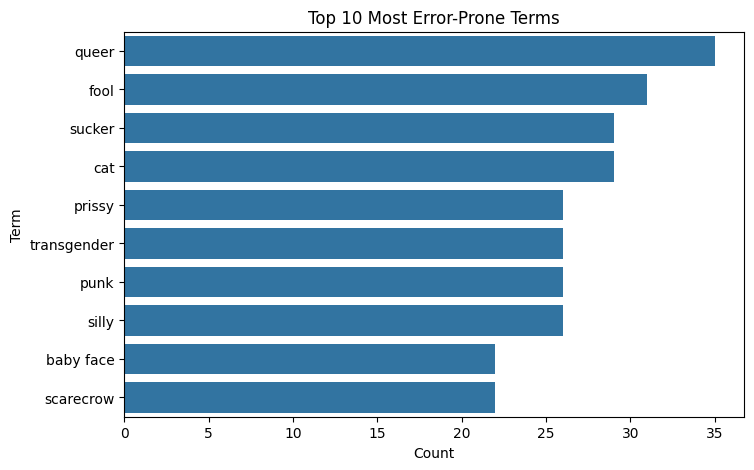

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load predictions CSV
df = pd.read_csv("./predictions/mlp-hateBERT-example-last-splitbyid.csv")

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Hateful", "Hateful"],
                yticklabels=["Not Hateful", "Hateful"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# 1. Confusion Matrix
plot_confusion_matrix(df['encoded_label'], df['prediction'])

# 2. Show classification report
print(classification_report(df['encoded_label'], df['prediction']))

# 3. False Positives and False Negatives
false_pos = df[(df['encoded_label'] == 0) & (df['prediction'] == 1)]
false_neg = df[(df['encoded_label'] == 1) & (df['prediction'] == 0)]

print("\n🔴 False Positives (Not Hateful → Hateful):")
display(false_pos[['example', 'term', 'annotation_label', 'annotator_id']].head(5))

print("\n🔵 False Negatives (Hateful → Not Hateful):")
display(false_neg[['example', 'term', 'annotation_label', 'annotator_id']].head(5))

# 4. High disagreement examples (disagreement with majority)
disagreements = df[df['agree_with_majority_binary'] == False]

print(f"\n⚠️ Total Disagreements with Majority: {len(disagreements)}")
print(disagreements[['example', 'term', 'annotation_label', 'annotator_id']].sample(5))

# 5. Most frequent error terms
error_terms = pd.concat([false_pos, false_neg])
term_counts = error_terms['term'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=term_counts.values, y=term_counts.index)
plt.title("Top 10 Most Error-Prone Terms")
plt.xlabel("Count")
plt.ylabel("Term")
plt.show()


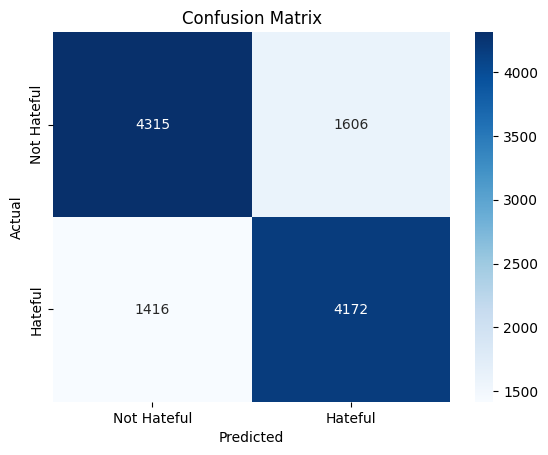

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      5921
         1.0       0.72      0.75      0.73      5588

    accuracy                           0.74     11509
   macro avg       0.74      0.74      0.74     11509
weighted avg       0.74      0.74      0.74     11509


🔴 False Positives (Not Hateful → Hateful):


,example,term,annotation_label,annotator_id
1,"It’s my reaction to the violence, however, tha...",pearl-clutcher,Not hateful,annotator_74
8,He was squatting on the ground like a blackfel...,blackfellow,Not hateful,annotator_78
15,But you must not like him because he appointed...,cdesign proponentsist,Not hateful,annotator_58
21,"Food, real food, not nut cutlets then, and not...",yoghurt-knitter,Not hateful,annotator_78
24,[H]is small frame seeming scarecrowed in the o...,scarecrow,Not hateful,annotator_30



🔵 False Negatives (Hateful → Not Hateful):


,example,term,annotation_label,annotator_id
2,This list has been limited to members and coho...,simp,Strongly hateful,annotator_5
10,You've got to fire that fuckup.,fuckup,Strongly hateful,annotator_10
13,"According to another superstition, the longer ...",peeler,Weakly hateful,annotator_79
17,"Why, you would not be boosing till lightman's ...",square,Weakly hateful,annotator_25
23,Sealed cells with about to emerge queens are u...,queen,Weakly hateful,annotator_36



⚠️ Total Disagreements with Majority: 1745
                                                 example         term  \
2121   There were the tawny rocks, like lions couchan...        tawny   
1600   I don't want to be a media whore," says Babydo...        whore   
11505  You brought them home, old trollface, but you ...    trollface   
1535   If he is small and weak, he may decide to beco...         punk   
724    Also there are the "Holy Rollers" and "Holy Ju...  Holy Roller   

      annotation_label  annotator_id  
2121    Weakly hateful  annotator_65  
1600    Weakly hateful  annotator_66  
11505      Not hateful  annotator_65  
1535       Not hateful  annotator_58  
724        Not hateful  annotator_74  


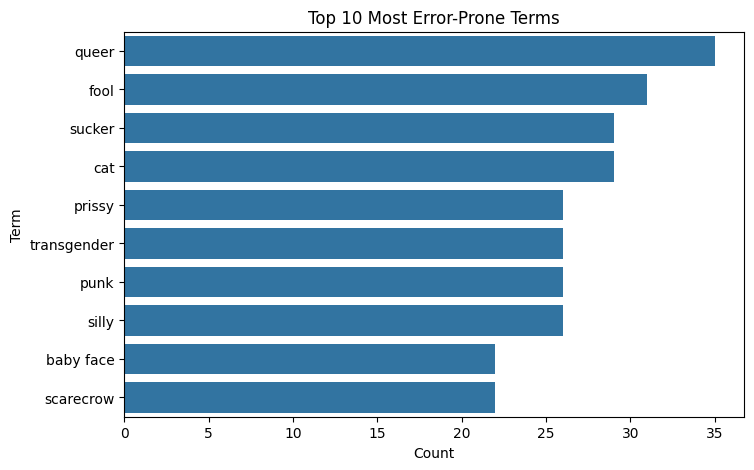

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load predictions CSV
df = pd.read_csv("./predictions/hatewic-hatebert-example-last.csv")

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Hateful", "Hateful"],
                yticklabels=["Not Hateful", "Hateful"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# 1. Confusion Matrix
plot_confusion_matrix(df['encoded_label'], df['prediction'])

# 2. Show classification report
print(classification_report(df['encoded_label'], df['prediction']))

# 3. False Positives and False Negatives
false_pos = df[(df['encoded_label'] == 0) & (df['prediction'] == 1)]
false_neg = df[(df['encoded_label'] == 1) & (df['prediction'] == 0)]

print("\n🔴 False Positives (Not Hateful → Hateful):")
display(false_pos[['example', 'term', 'annotation_label', 'annotator_id']].head(5))

print("\n🔵 False Negatives (Hateful → Not Hateful):")
display(false_neg[['example', 'term', 'annotation_label', 'annotator_id']].head(5))

# 4. High disagreement examples (disagreement with majority)
disagreements = df[df['agree_with_majority_binary'] == False]

print(f"\n⚠️ Total Disagreements with Majority: {len(disagreements)}")
print(disagreements[['example', 'term', 'annotation_label', 'annotator_id']].sample(5))

# 5. Most frequent error terms
error_terms = pd.concat([false_pos, false_neg])
term_counts = error_terms['term'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=term_counts.values, y=term_counts.index)
plt.title("Top 10 Most Error-Prone Terms")
plt.xlabel("Count")
plt.ylabel("Term")
plt.show()


In [35]:
import torch, pickle, re
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
from difflib import get_close_matches
from os import path

class ContextEncoder(torch.nn.Module):
    def __init__(self, encoder_name):
        super(ContextEncoder, self).__init__()
        self.context_encoder = AutoModel.from_pretrained(encoder_name, output_hidden_states=True)

    def forward(self, input_ids):
        context_output = self.context_encoder(input_ids)
        return context_output

class BiEncoderModel(torch.nn.Module):
    def __init__(self, encoder_name):
        super(BiEncoderModel, self).__init__()
        self.context_encoder = ContextEncoder(encoder_name)

    def context_forward(self, context_input):
        return self.context_encoder.forward(context_input)
    

def find_target_indices(tknzr, example, term):
            
    # encode example and target term
    example_encoding = tknzr.encode(example, truncation=True)
    term_encoding = tknzr.encode(term, add_special_tokens=False)
    
    # find indices for target term
    term_indices = None
    for i in range(len(example_encoding)):
        if example_encoding[i:i+len(term_encoding)] == term_encoding:
            term_indices = (i, i+len(term_encoding))
    
    if not term_indices:
        new_term = None
        new_example = None
        
        # try plural (simple rules)
        if term + 's' in example:
            new_term = term + 's'
        elif term.replace('y', 'ies') in example:
            new_term = term.replace('y', 'ies')
        elif term.replace('man', 'men') in example:
            new_term = term.replace('man', 'men')
        else:
            # try to find the most similar word in the example
            potential_target = get_close_matches(term, example.split(), n=1, cutoff=0.6)
            if len(potential_target) == 1:
                most_similar = re.sub(r'[^\w\s-]','', potential_target[0])
                # replace the most similar word (for which we assume misspelling) with the target term
                new_example = example.replace(most_similar, term)
        
        if new_term or new_example:
            # encode new term or example
            if new_term:
                term_encoding = tknzr.encode(new_term, add_special_tokens=False)
            elif new_example:
                example_encoding = tknzr.encode(new_example, truncation=True)
            # try finding indices again
            for i in range(len(example_encoding)):
                if example_encoding[i:i+len(term_encoding)] == term_encoding:
                    term_indices = (i, i+len(term_encoding))
    
    return term_indices


def extract_biencoder_embedding(model, example_encoding, term_indices, layers):

    # feed example encodings to the model    
    input_ids = torch.tensor([example_encoding])
    encoded_layers = model.context_forward(input_ids)[-1]
    
    # extract selection of hidden layer(s)
    if layers == 'last':
        layers = -1
        vecs = encoded_layers[layers].squeeze(0)
    elif layers == 'lastfour':
        layers = [-4, -3, -2, -1]
        selected_encoded_layers = [encoded_layers[x] for x in layers]
        vecs = torch.mean(torch.stack(selected_encoded_layers), 0).squeeze(0)
    elif layers == 'all':
        vecs = torch.mean(torch.stack(encoded_layers), 0).squeeze(0)
    
    # target word selection 
    vecs = vecs.detach()
    start_idx, end_idx = term_indices
    vecs = vecs[start_idx:end_idx]
    
    # aggregate sub-word embeddings (by averaging)
    vector = torch.mean(vecs, 0)
    
    return vector


def extract_embedding(model, example_encoding, term_indices, layers):

    # feed example encodings to the model    
    input_ids = torch.tensor([example_encoding])
    encoded_layers = model(input_ids)[-1]
    
    # extract selection of hidden layer(s)
    if layers == 'last':
        layers = -1
        vecs = encoded_layers[layers].squeeze(0)
    elif layers == 'lastfour':
        layers = [-4, -3, -2, -1]
        selected_encoded_layers = [encoded_layers[x] for x in layers]
        vecs = torch.mean(torch.stack(selected_encoded_layers), 0).squeeze(0)
    elif layers == 'all':
        vecs = torch.mean(torch.stack(encoded_layers), 0).squeeze(0)
    
    # target word selection 
    vecs = vecs.detach()
    start_idx, end_idx = term_indices
    vecs = vecs[start_idx:end_idx]
    
    # aggregate sub-word embeddings (by averaging)
    vector = torch.mean(vecs, 0)
    
    return vector


def dataid2biencoderembeddings(input_path, example_column, id_column, output_path, encoder_model_name, wsd_biencoder_path, layers, type='token'):

    data = pd.read_csv(input_path)
    tknzr = AutoTokenizer.from_pretrained(encoder_model_name)
    model = BiEncoderModel(encoder_model_name)
    model.load_state_dict(torch.load(wsd_biencoder_path, map_location=torch.device('cpu')), strict=False)
    model.eval()

    embeddings = dict()
    for _, row in tqdm(data.iterrows()):
        example = row[example_column].lower() 
        example_encoding = tknzr.encode(example, truncation=True)
        if type == 'token':
            term_indices = find_target_indices(tknzr, example, row['term'].lower())     
        elif type == 'sentence':
            term_indices = (0, len(example_encoding))
        if term_indices:
            # extract embedding
            vector = extract_biencoder_embedding(model, example_encoding, term_indices, layers=layers)
            embeddings[row[id_column]] = vector
    
    with open(output_path, 'wb') as outfile:
        pickle.dump(embeddings, outfile)


def dataid2embeddings(input_path, example_column, id_column, output_path, model_name, layers, type='token'):

    data = pd.read_csv(input_path)
    tknzr = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
    model.eval()

    embeddings = dict()
    for _, row in tqdm(data.iterrows()):
        example = row[example_column].lower()
        example_encoding = tknzr.encode(example, truncation=True)
        if type == 'token':
            term_indices = find_target_indices(tknzr, example, row['term'].lower())
        elif type == 'sentence':
            term_indices = (0, len(example_encoding))
        if term_indices:
            vector = extract_embedding(model, example_encoding, term_indices, layers=layers)
            embeddings[row[id_column]] = vector
        else:
            print(f"⚠️ Skipping ID {row[id_column]} — term '{row['term']}' not found in example.")

    
    with open(output_path, 'wb') as outfile:
        pickle.dump(embeddings, outfile)


def concatenate_embeddings(embedding_path1, embedding_path2, output_path):
    
    embeddings = dict()

    with open(embedding_path1, 'rb') as infile:
        id2embeddings1 = pickle.load(infile)
    
    with open(embedding_path2, 'rb') as infile:
        id2embeddings2 = pickle.load(infile)

    for id, e1 in id2embeddings1.items():
        e2 = id2embeddings2[id]
        embeddings[id] = torch.cat((e1, e2))

    with open(output_path, 'wb') as outfile:
        pickle.dump(embeddings, outfile)


def get_embedding_file(data_path, id_column, embedding_dir, embedding_type, model, layers):

    model_name = model.rsplit('/',1)[1] if '/' in model else model
    model_name = model_name.rsplit('.',1)[0] if '.' in model_name else model_name

    if 'example' in embedding_type:
        embedding_path = embedding_dir + f'{model_name}-{layers}-examples'
        if not path.exists(embedding_path):
            if 'biencoder' in model_name:
                dataid2biencoderembeddings(data_path, 'example', id_column, embedding_path, 'bert-base-uncased', model, layers)
            else:
                # dataid2embeddings(data_path, 'example', id_column, embedding_path, model, layers, type='token')
                dataid2embeddings(data_path, 'example', id_column, embedding_path, model, layers, type='sentence')


    if 'generated_definition' in embedding_type:
        definition_path = embedding_dir + f'{model_name}-{layers}-generated_definitions'
        if not path.exists(definition_path):
            if 'biencoder' in model_name:
                dataid2biencoderembeddings(data_path, 'generated_definition', id_column, definition_path, 'bert-base-uncased', model, layers, type='sentence')
            else:
                dataid2embeddings(data_path, 'generated_definition', id_column, definition_path, model, layers, type='sentence')
        if not 'example' in embedding_type:
            embedding_path = definition_path
        else:
            combined_path = embedding_path+'-generated_definitions'
            if not path.exists(combined_path):
                concatenate_embeddings(embedding_path, definition_path, combined_path)
            embedding_path = combined_path
    elif 'definition' in embedding_type:
        definition_path = embedding_dir + f'{model_name}-{layers}-definitions'
        if not path.exists(definition_path):
            if 'biencoder' in model_name:
                dataid2biencoderembeddings(data_path, 'definition', id_column, definition_path, 'bert-base-uncased', model, layers, type='sentence')
            else:
                dataid2embeddings(data_path, 'definition', id_column, definition_path, model, layers, type='sentence')
        if not 'example' in embedding_type:
            embedding_path = definition_path
        else:
            combined_path = embedding_path+'-definitions'
            if not path.exists(combined_path):
                concatenate_embeddings(embedding_path, definition_path, combined_path)
            embedding_path = combined_path
    
    if 'target' in embedding_type:
        target_path = embedding_dir + f'{model_name}-{layers}-targets'
        if not path.exists(target_path):
            if 'biencoder' in model_name:
                dataid2biencoderembeddings(data_path, 'profile_description', id_column, target_path, 'bert-base-uncased', model, layers, type='sentence')
            else:
                dataid2embeddings(data_path, 'profile_description', id_column, target_path, model, layers, type='sentence')
        combined_path = embedding_path+'-targets'
        if not path.exists(combined_path):
            concatenate_embeddings(embedding_path, target_path, combined_path)
        embedding_path = combined_path
    
    return embedding_path

In [36]:
import torch
from torchmetrics.functional import pairwise_cosine_similarity
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def train_test_MLP(X_train, y_train, X_test, y_test, params):

    X_train = torch.stack(X_train)  
    X_test = torch.stack(X_test)

    clf = MLPClassifier(random_state=12).set_params(**params).fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return predictions, accuracy

@ignore_warnings(category=ConvergenceWarning)
def MLP_GridSearch(X_dev, y_dev, 
                   param_grid = {
                       'hidden_layer_sizes':[(300, 200, 100, 50), (200, 100, 50), (100, 50)], 
                       'learning_rate_init':[0.0005, 0.001, 0.005],
                       'max_iter': [10, 20, 40, 80, 100, 200]}):

    mlp = MLPClassifier(random_state=12)
    clf = GridSearchCV(mlp, param_grid)
    clf.fit(torch.stack(X_dev), y_dev)

    return clf.best_params_


def train_test_DimProj(train_data, X_train, y_train, X_test, y_test, params):
    # binary classification only

    pos_vecs, neg_vecs = [], []
    pos_data_ids, neg_data_ids = [], []
    for i, y in enumerate(y_train):
        if y == 0:
            pos_vecs.append(X_train[i])
            #pos_data_ids.append(train_data[i]['id'])
        else:
            neg_vecs.append(X_train[i])
            #neg_data_ids.append(train_data[i]['id'])

    # create dimension vector
    pairwise_dist = pairwise_cosine_similarity(torch.stack(pos_vecs), torch.stack(neg_vecs))
    pairwise_dist_dict = dict()
    for p_id in range(len(pos_vecs)):
        for n_id in range(len(neg_vecs)):
            pairwise_dist_dict[(p_id, n_id)] = pairwise_dist[p_id, n_id].item()
    top_similar_pairs = [pair for pair, sim in pairwise_dist_dict.items() if sim >= params['sim_thres']]
    
    if len(top_similar_pairs) > 0:
        diff_vecs = [pos_vecs[p_id] - neg_vecs[n_id] for (p_id, n_id) in top_similar_pairs]
        dimension = torch.mean(torch.stack(diff_vecs), 0)

        #dimension_data = [(pos_data_ids[pos_id], neg_data_ids[neg_id], 
                #pairwise_dist_dict[(pos_id, neg_id)]) for (pos_id, neg_id) in top_similar_pairs]

        # project test embeddings
        cos = torch.nn.CosineSimilarity(dim=0)
        threshold = 0 # make this decision threshold a parameter?
        predictions = []
        for x in X_test:
            cossim = cos(x, dimension).item()
            predictions.append(1 if cossim > threshold else 0)
        accuracy = accuracy_score(y_test, predictions)
    
        return predictions, accuracy, len(top_similar_pairs)
    
    print(f"No pairs with similarity above threshold {params['sim_thres']}")
    return [], 0, 0

def DimProj_SimThresSearch(X_train, y_train, X_dev, y_dev, 
                            sim_thresholds=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
    
    best_acc = 0
    for st in sim_thresholds:
        params = {'sim_thres': st}
        _, acc = train_test_DimProj([], X_train, y_train, X_dev, y_dev, params)
        #print('similarity threshold', st, '- accuracy:', acc)
        if acc > best_acc:
            best_acc = acc
            best_params = {'sim_thres': st}
    
    return best_params
    

In [37]:
import pickle, more_itertools, random
from tqdm import tqdm
import pandas as pd
# from classification import train_test_MLP, train_test_DimProj
from sklearn.metrics import accuracy_score, classification_report

def fivefoldsplits2instances(instances):
    random.shuffle(instances)
    fivefolds = [set(fold) for fold in more_itertools.divide(5, instances)]
    fold2instances = {i: {'test': fivefolds[i-2],
                    'train': set().union(*[f for j, f in enumerate(fivefolds) if (j) != (4 if i == 1 else i-2)])
                    } for i in range(1, 6)}
    return fold2instances


def get_split_data(data, id2embeddings, split2ids):

    train_X, train_y, test_X, test_y = [], [], [], []
    train_data, test_data = [], []
    for _, row in data.iterrows():
        if row['id'] in split2ids['train']:
            train_X.append(id2embeddings[row['id']])
            train_y.append(row['encoded_label'])
            train_data.append(row)
        elif row['id'] in split2ids['test']:
            test_X.append(id2embeddings[row['id']])
            test_y.append(row['encoded_label'])
            test_data.append(row)

    return train_X, train_y, test_X, test_y,\
          train_data, test_data


def dinu_evaluate(data_path, label_column, embedding_path, output_path, clf, params, random_split_seed):

    logs = []
    random.seed(random_split_seed)

    # load sense representations of model
    with open(embedding_path, 'rb') as infile:
        id2embeddings = pickle.load(infile)
    
    # load and shuffle data and encode labels
    data = pd.read_csv(data_path).sample(frac=1, random_state=12, ignore_index=True) 
    data['encoded_label'] = data[label_column]
    # exclude data for which no model representations exist
    data = data[data['id'].isin(id2embeddings)]
    
    # initialize 5 folds based on ids 
    fold2ids = fivefoldsplits2instances(list(set(data['id'])))
    fivefold_accuracies, test_data, test_predictions = [], [], []
    for i, (fold_no, split2ids) in tqdm(enumerate(fold2ids.items())):
        assert len(set.intersection(*list(split2ids.values()))) == 0
        logs.append(f"\nFold {fold_no}")
        
        # get data based on sets of ids
        train_X, train_y, test_X, test_y,\
          train_fold_data, test_fold_data = get_split_data(data, id2embeddings, split2ids)
        logs.append(f"Train size: {len(train_y)} / Test size: {len(test_y)}")
        test_data.extend([dict(row, **{'test_fold_no': fold_no}) for row in test_fold_data])

        # train and test classification model
        if clf == 'mlp':
            predictions, accuracy = train_test_MLP(train_X, train_y, test_X, test_y, params)
        elif clf == 'dimproj':
            predictions, accuracy = train_test_DimProj(train_fold_data, train_X, train_y, test_X, test_y, params) 
            
        logs.append(f"Accuracy: {accuracy}")
        fivefold_accuracies.append(accuracy)
        test_predictions.extend(predictions)
    
    # save preds
    output_df = pd.DataFrame(test_data)
    output_df['prediction'] = test_predictions
    output_df.to_csv(output_path, index=False)

    logs.append(f'\nAverage of accuracies over {len(fivefold_accuracies)} folds: {sum(fivefold_accuracies)/len(fivefold_accuracies)}')
    logs.append(f"Overall accuracy of predictions for all test folds: {accuracy_score(output_df['encoded_label'], output_df['prediction'])}")
    logs.append(classification_report(output_df['encoded_label'], output_df['prediction'])) 
    logs.append(f"\nAccuracy of predictions for each term:")
    term_accuracies = []
    for term in set(output_df['term']):
        preds = [p for p, t in zip(output_df['prediction'], output_df['term']) if t == term]
        gold = [g for g, t in zip(output_df['encoded_label'], output_df['term']) if t == term]
        acc = accuracy_score(gold, preds)
        term_accuracies.append(acc)
        logs.append(f"{term}: {acc}")
    logs.append(f'\nAverage of accuracies over {len(term_accuracies)} terms: {sum(term_accuracies)/len(term_accuracies)}')

    return logs

In [38]:
# # from embeddings import get_embedding_file

# embedding_path = get_embedding_file(
#     data_path="dinu1_clean.csv",
#     id_column="id",
#     embedding_dir="./embeddings/",
#     embedding_type="example",
#     model="GroNLP/hateBERT",
#     layers="last"
# )
# print("Embeddings saved at:", embedding_path)


embedding_path = get_embedding_file(
    data_path="dinu1_clean.csv",
    id_column="id",
    embedding_dir="./embeddings/",
    embedding_type="example",
    model="GroNLP/hateBERT",
    layers="last"
)

print("Embeddings saved at:", embedding_path)


Embeddings saved at: ./embeddings/hateBERT-last-examples


In [39]:
# from dinu_eval import dinu_evaluate

logs = dinu_evaluate(
    data_path="dinu1_clean.csv",
    label_column="binary_label",
    embedding_path=embedding_path,
    output_path="./predictions/dinu1-hatebert-example.csv",
    clf="mlp",
    params={"hidden_layer_sizes": (300, 200, 100, 50), "learning_rate_init": 0.0005, "max_iter": 10},
    random_split_seed=12
)

for log in logs:
    print(log)


0it [00:00, ?it/s]


RuntimeError: stack expects a non-empty TensorList

In [28]:
import pickle

with open("./embeddings/hateBERT-last-examples.pkl", "rb") as f:
    id2embeddings = pickle.load(f)

print("Number of embeddings:", len(id2embeddings))
print("Sample keys:", list(id2embeddings.keys())[:5])


FileNotFoundError: [Errno 2] No such file or directory: './embeddings/hateBERT-last-examples.pkl'

In [40]:
import pandas as pd
import torch
import pickle
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# Load cleaned DINU1
df = pd.read_csv("dinu1_clean.csv")

# Load HateBERT model
model_name = "GroNLP/hateBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

# Build embeddings dictionary
embeddings = {}

for _, row in tqdm(df.iterrows(), total=len(df)):
    try:
        example = row["example"].lower()
        input_ids = tokenizer.encode(example, truncation=True, return_tensors="pt")
        with torch.no_grad():
            outputs = model(input_ids)
            last_hidden_state = outputs.hidden_states[-1].squeeze(0)
            sentence_vector = torch.mean(last_hidden_state, dim=0)
            embeddings[row["id"]] = sentence_vector
    except Exception as e:
        print(f"❌ Failed on ID {row['id']}: {e}")

# Save to file
with open("hatebert-last-dinu1-fullsentence.pkl", "wb") as f:
    pickle.dump(embeddings, f)

print("✅ Saved embeddings:", len(embeddings))


100%|██████████| 1018/1018 [00:58<00:00, 17.34it/s]


✅ Saved embeddings: 1018


In [41]:
# from dinu_eval import dinu_evaluate

logs = dinu_evaluate(
    data_path="dinu1_clean.csv",
    label_column="binary_label",
    embedding_path="hatebert-last-dinu1-fullsentence.pkl",
    output_path="predictions/dinu1-hatebert-example.csv",
    clf="mlp",
    params={"hidden_layer_sizes": (300, 200, 100, 50), "learning_rate_init": 0.0005, "max_iter": 10},
    random_split_seed=12
)

for log in logs:
    print(log)


5it [00:07,  1.43s/it]


Fold 1
Train size: 815 / Test size: 203
Accuracy: 0.7339901477832512

Fold 2
Train size: 814 / Test size: 204
Accuracy: 0.7107843137254902

Fold 3
Train size: 814 / Test size: 204
Accuracy: 0.7009803921568627

Fold 4
Train size: 814 / Test size: 204
Accuracy: 0.6911764705882353

Fold 5
Train size: 815 / Test size: 203
Accuracy: 0.6798029556650246

Average of accuracies over 5 folds: 0.7033468559837728
Overall accuracy of predictions for all test folds: 0.7033398821218074
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       549
           1       0.66      0.72      0.69       469

    accuracy                           0.70      1018
   macro avg       0.70      0.70      0.70      1018
weighted avg       0.71      0.70      0.70      1018


Accuracy of predictions for each term:
cracker: 0.6666666666666666
retarded: 0.9375
jesus: 0.6666666666666666
black: 0.5
piece: 1.0
bag: 0.7333333333333333
flip: 1.0
bag bitch: 0.0
monkey: 0.7187

In [42]:
import pandas as pd
import torch
import pickle
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# Load cleaned DINU2
df = pd.read_csv("dinu2_clean.csv")

# Load HateBERT model
model_name = "GroNLP/hateBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

embeddings = {}

for _, row in tqdm(df.iterrows(), total=len(df)):
    try:
        example = row["example"].lower()
        input_ids = tokenizer.encode(example, truncation=True, return_tensors="pt")
        with torch.no_grad():
            outputs = model(input_ids)
            last_hidden_state = outputs.hidden_states[-1].squeeze(0)
            sentence_vector = torch.mean(last_hidden_state, dim=0)
            embeddings[row["id"]] = sentence_vector
    except Exception as e:
        print(f"❌ Failed on ID {row['id']}: {e}")

with open("hatebert-last-dinu2-fullsentence.pkl", "wb") as f:
    pickle.dump(embeddings, f)

print("✅ Saved embeddings:", len(embeddings))


100%|██████████| 313/313 [00:18<00:00, 17.29it/s]

✅ Saved embeddings: 313


In [43]:
# from dinu_eval import dinu_evaluate

logs = dinu_evaluate(
    data_path="dinu2_clean.csv",
    label_column="binary_label",
    embedding_path="hatebert-last-dinu2-fullsentence.pkl",
    output_path="predictions/dinu2-hatebert-example.csv",
    clf="mlp",
    params={"hidden_layer_sizes": (300, 200, 100, 50), "learning_rate_init": 0.0005, "max_iter": 10},
    random_split_seed=12
)

for log in logs:
    print(log)
# 

5it [00:03,  1.63it/s]


Fold 1
Train size: 251 / Test size: 62
Accuracy: 0.7903225806451613

Fold 2
Train size: 250 / Test size: 63
Accuracy: 0.6825396825396826

Fold 3
Train size: 250 / Test size: 63
Accuracy: 0.6984126984126984

Fold 4
Train size: 250 / Test size: 63
Accuracy: 0.7142857142857143

Fold 5
Train size: 251 / Test size: 62
Accuracy: 0.6129032258064516

Average of accuracies over 5 folds: 0.6996927803379417
Overall accuracy of predictions for all test folds: 0.6996805111821086
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       152
           1       0.71      0.71      0.71       161

    accuracy                           0.70       313
   macro avg       0.70      0.70      0.70       313
weighted avg       0.70      0.70      0.70       313


Accuracy of predictions for each term:
cracker: 0.6666666666666666
tom: 0.8148148148148148
cry: 0.7777777777777778
retarded: 0.7241379310344828
black: 0.6428571428571429
trash: 0.7
monkey: 0.692307692

In [2]:
# !pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


You should consider upgrading via the 'C:\Users\archi\Documents\UIC\421\paper-reproducibility\venv\Scripts\python.exe -m pip install --upgrade pip' command.
